In [5]:
import pandas as pd, numpy as np, os

os.chdir('data')

filename = 'Country-data.csv'
data = pd.read_csv(filename, sep=',')

In [90]:
data_org = pd.read_csv('Country-data.csv', sep=',')

In [7]:
filename = 'data-dictionary.csv'
dsc = pd.read_csv(filename, sep=',')

In [106]:
data_org

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [18]:
for x in range(dsc.shape[0]):
    print(f'Columns{x}: {dsc.iloc[x,0]} --- Description: {dsc.iloc[x,1]}')


Columns0: country --- Description: Name of the country
Columns1: child_mort --- Description: Death of children under 5 years of age per 1000 live births
Columns2: exports --- Description: Exports of goods and services per capita. Given as %age of the GDP per capita
Columns3: health --- Description: Total health spending per capita. Given as %age of GDP per capita
Columns4: imports --- Description: Imports of goods and services per capita. Given as %age of the GDP per capita
Columns5: Income --- Description: Net income per person
Columns6: Inflation --- Description: The measurement of the annual growth rate of the Total GDP
Columns7: life_expec --- Description: The average number of years a new born child would live if the current mortality patterns are to remain the same
Columns8: total_fer --- Description: The number of children that would be born to each woman if the current age-fertility rates remain the same.
Columns9: gdpp --- Description: The GDP per capita. Calculated as the Tot

In [20]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [25]:
data['income'] =data['income'].astype(float)

In [27]:
data['gdpp'] =data['gdpp'].astype(float)

In [28]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [44]:
data = data.drop(columns='country', axis=1)

In [41]:
log_cols = data.skew().sort_values(ascending=False)
log_cols = log_cols.loc[log_cols > 0.75]
log_cols

C:\Users\moon\AppData\Local\Temp/ipykernel_21944/1209083428.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  log_cols = data.skew().sort_values(ascending=False)


inflation     5.154049
exports       2.445824
income        2.231480
gdpp          2.218051
imports       1.905276
child_mort    1.450774
total_fer     0.967092
dtype: float64

In [42]:
for col in log_cols.index:
    data[col] = np.log1p(data[col])

c:\users\moon\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [45]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.513055,2.397895,7.58,3.826465,7.384610,2.345645,56.2,1.919859,6.317165
1,2.867899,3.367296,6.55,3.903991,9.203416,1.702928,76.3,0.974560,8.316545
2,3.342862,3.673766,4.17,3.478158,9.465060,2.839078,76.5,1.358409,8.403128
3,4.787492,4.147885,2.85,3.781914,8.682877,3.152736,60.1,1.968510,8.169336
4,2.424803,3.839452,6.03,4.092677,9.857496,0.891998,76.8,1.141033,9.409273
...,...,...,...,...,...,...,...,...,...
162,3.407842,3.862833,5.25,3.983413,7.989899,1.286474,63.0,1.504077,7.996654
163,2.895912,3.384390,4.91,2.923162,9.711176,3.848018,75.4,1.244155,9.510519
164,3.190476,4.290459,6.84,4.396915,8.409831,2.572612,73.1,1.081805,7.178545
165,4.048301,3.433987,5.18,3.566712,8.407602,3.202746,67.5,1.735189,7.178545


In [47]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
    data[col] = mms.fit_transform(data[[col]])

In [48]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.795814,0.441251,0.358608,0.737634,0.182457,0.743428,0.475345,0.840523,0.142343
1,0.390743,0.627680,0.294593,0.752832,0.524170,0.671990,0.871795,0.152242,0.469307
2,0.507689,0.686618,0.146675,0.669351,0.573327,0.798274,0.875740,0.431726,0.483466
3,0.863386,0.777797,0.064636,0.728900,0.426373,0.833137,0.552268,0.875946,0.445234
4,0.281644,0.718482,0.262275,0.789822,0.647057,0.581854,0.881657,0.273452,0.648004
...,...,...,...,...,...,...,...,...,...
162,0.523688,0.722978,0.213797,0.768402,0.296178,0.625700,0.609467,0.537788,0.416995
163,0.397641,0.630967,0.192666,0.560549,0.619567,0.910419,0.854043,0.348536,0.664561
164,0.470168,0.805216,0.312617,0.849466,0.375073,0.768656,0.808679,0.230328,0.283207
165,0.681382,0.640505,0.209447,0.686711,0.374654,0.838696,0.698225,0.706063,0.283207


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   163 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [54]:
dt = data.copy()

In [60]:
for col in list(dt.columns):
    dt.dropna(subset = [col], inplace=True)

In [72]:
for col in list(data.columns):
    data.dropna(subset = [col], inplace=True)

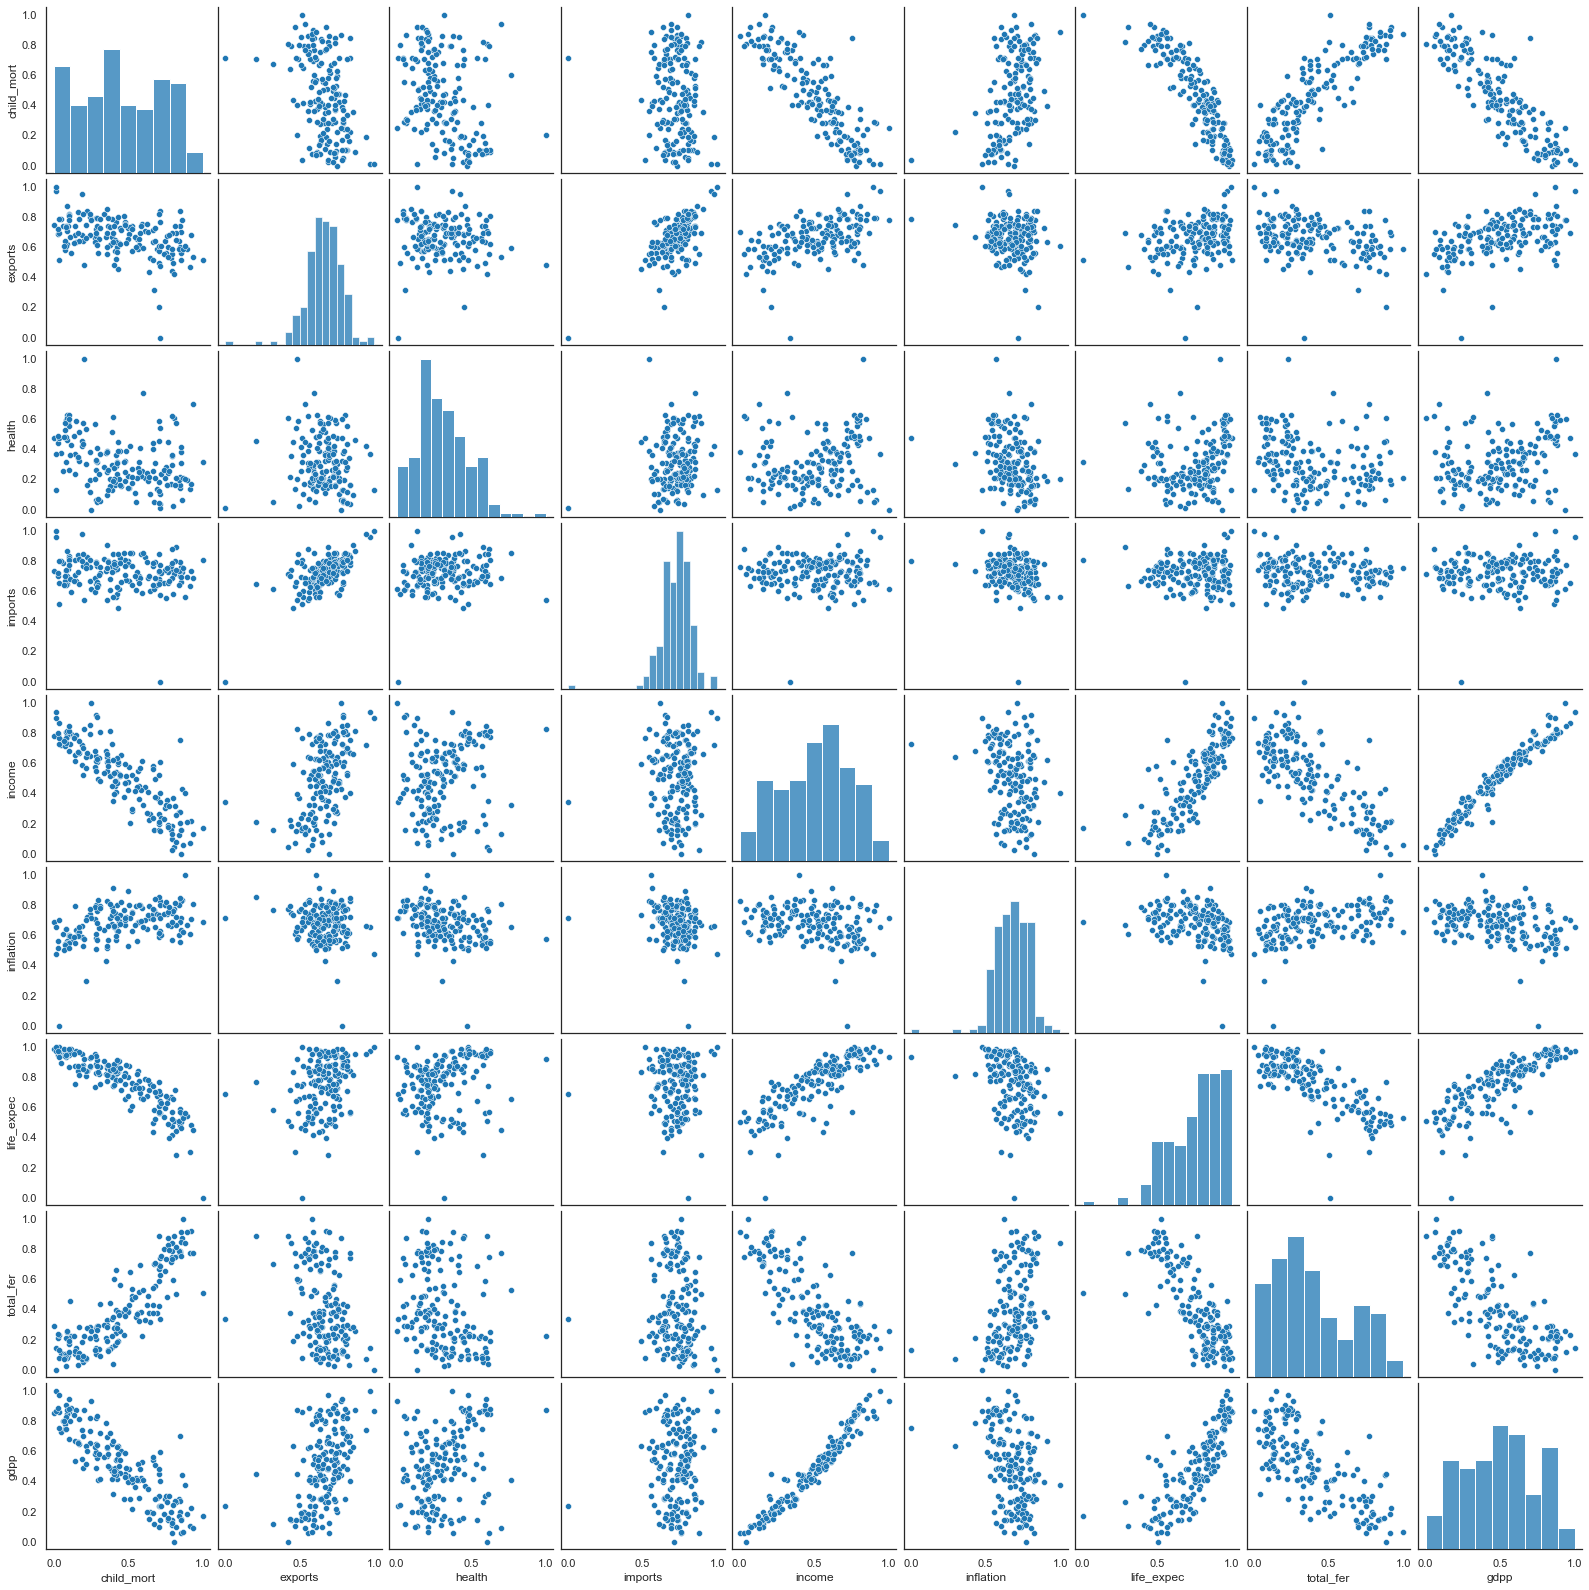

In [49]:
import seaborn as sns, matplotlib.pyplot as plt
# from colorsetup import colors, palette
# sns.set_palette(palette)

sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(data);

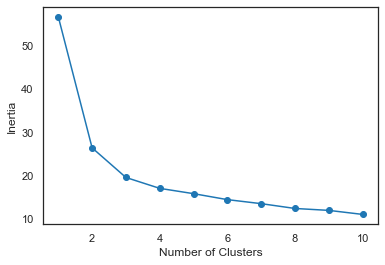

In [73]:
from sklearn.cluster import KMeans

inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(data)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [75]:
km = KMeans(n_clusters=4)
km.fit(data)

KMeans(n_clusters=4)

In [76]:
km.labels_

array([1, 2, 3, 1, 2, 2, 2, 0, 0, 2, 0, 0, 3, 2, 2, 0, 3, 1, 3, 3, 2, 3,
       2, 0, 2, 1, 1, 3, 1, 0, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 0, 0, 0,
       3, 2, 3, 2, 3, 1, 0, 3, 0, 0, 3, 1, 2, 0, 1, 0, 2, 3, 1, 1, 3, 1,
       0, 0, 3, 3, 2, 3, 0, 0, 2, 3, 2, 1, 1, 0, 3, 3, 0, 2, 1, 1, 2, 0,
       0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3, 0, 0, 1,
       1, 0, 2, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 1, 3, 2, 1, 2, 1, 0, 0, 0,
       3, 3, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 3, 2, 2, 3, 1, 2, 0,
       0, 0, 2, 3, 3, 2, 3, 1, 1])

In [85]:
data['cluster'] = km.labels_

In [89]:
data_org

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [91]:
data['country'] = data_org['country']

In [94]:
data = data.drop(columns='Cluster', axis=1)

In [ ]:
(data[['color','agglom','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

In [116]:
groups = data[['cluster','country','gdpp']]

In [134]:
groups.sort_values(by='cluster').set_index('cluster')

,country,gdpp
cluster,,
0,Luxembourg,1.000000
0,Lithuania,0.645301
0,Brunei,0.821740
0,Kuwait,0.835930
0,Cyprus,0.799440
...,...,...
3,South Africa,0.563580
3,Bhutan,0.366444
3,Belize,0.479007


In [127]:
groups.groupby('cluster').gdpp.mean()

cluster
0    0.810373
1    0.197456
2    0.551980
3    0.404059
Name: gdpp, dtype: float64

In [142]:
groups.groupby('cluster').size()

cluster
0    40
1    41
2    45
3    37
dtype: int64

In [143]:
g1 = groups.loc[groups.cluster==1,:].set_index('cluster').sort_values(by='gdpp', ascending=True)

In [148]:
g1

,country,gdpp
cluster,,
1,Burundi,0.000000
1,Liberia,0.056627
1,"Congo, Dem. Rep.",0.060081
1,Niger,0.066776
1,Sierra Leone,0.089081
1,Madagascar,0.094706
1,Mozambique,0.097059
1,Central African Republic,0.107248
1,Malawi,0.111936


In [149]:
g1.country

cluster
1                     Burundi
1                     Liberia
1            Congo, Dem. Rep.
1                       Niger
1                Sierra Leone
1                  Madagascar
1                  Mozambique
1    Central African Republic
1                      Malawi
1                     Eritrea
1                        Togo
1               Guinea-Bissau
1                 Afghanistan
1                      Gambia
1                      Rwanda
1                Burkina Faso
1                      Uganda
1                      Guinea
1                       Haiti
1                    Tanzania
1                        Mali
1                  Tajikistan
1                       Benin
1                     Comoros
1                        Chad
1                       Kenya
1                     Myanmar
1                     Senegal
1                    Pakistan
1                     Lesotho
1                  Mauritania
1               Cote d'Ivoire
1                       Ghana
1 

In [161]:
groups.loc[groups.cluster==3,:].set_index('cluster').sort_values(by='gdpp', ascending=True)

,country,gdpp
cluster,,
3,Nepal,0.153468
3,Bangladesh,0.193829
3,Cambodia,0.199754
3,Kyrgyz Republic,0.218205
3,Lao,0.260495
3,Solomon Islands,0.280693
3,Vietnam,0.283207
3,India,0.288122
3,Uzbekistan,0.291714


In [171]:
data.loc[data.country=='Angola',:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
3,0.863386,0.777797,0.064636,0.7289,0.426373,0.833137,0.552268,0.875946,0.445234,1,Angola


In [168]:
data.loc[data.country=='Timor-Leste',:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
149,0.707066,0.203793,0.454319,0.646261,0.208548,0.851083,0.769231,0.883029,0.448444,1,Timor-Leste


In [172]:
data.loc[data.country=='Samoa',:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
127,0.420984,0.635477,0.289621,0.769857,0.409738,0.593929,0.77712,0.662403,0.441486,3,Samoa


In [177]:
data.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,0.129433,0.732979,0.416889,0.737676,0.776359,0.578930,0.928550,0.165223,0.810373
1,0.800601,0.558411,0.282951,0.694050,0.204551,0.721227,0.537307,0.752040,0.197456
2,0.354626,0.672646,0.298709,0.712367,0.582728,0.697757,0.840806,0.231976,0.551980
3,0.579522,0.683200,0.238490,0.742472,0.436810,0.711540,0.702649,0.468389,0.404059


In [180]:
data_processed = data.drop(columns=['cluster', 'country'])

In [182]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_processed)
# data['agglom'] = ag.fit_predict(data[float_columns])

In [184]:
ag.fit_predict(data_processed)

array([3, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 3, 1, 1, 0, 1,
       0, 0, 0, 3, 3, 1, 3, 2, 1, 3, 3, 0, 0, 0, 3, 3, 1, 0, 1, 2, 2, 2,
       0, 0, 1, 0, 1, 3, 2, 1, 2, 2, 1, 3, 0, 2, 1, 2, 0, 1, 3, 3, 1, 3,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 3, 3, 0, 1, 1, 2, 2, 3, 3, 0, 2,
       2, 0, 3, 3, 0, 0, 3, 2, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 1, 2, 2, 3,
       1, 2, 0, 3, 0, 1, 0, 1, 2, 2, 0, 0, 0, 3, 1, 0, 3, 0, 3, 2, 2, 2,
       1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 3, 0, 3, 3, 1, 0, 0, 1, 3, 0, 0,
       2, 2, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [186]:
data_ag = data_processed.copy()

In [187]:
data_ag['agglom'] = ag.fit_predict(data_processed)

In [189]:
data_ag['country'] = data.country

In [192]:
data_ag.groupby('agglom').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
agglom,,,,,,,,,
0,0.359571,0.680830,0.267383,0.703380,0.608648,0.716925,0.841341,0.244788,0.569483
1,0.627178,0.667506,0.219853,0.719066,0.407978,0.731520,0.673639,0.526629,0.373842
2,0.125854,0.721675,0.453126,0.746053,0.748856,0.552394,0.930811,0.157002,0.794844
3,0.802275,0.549799,0.328154,0.720383,0.168553,0.692531,0.518799,0.761291,0.173326


In [199]:
ag3 = data_ag[['agglom', 'country', 'gdpp']]

In [200]:
ag3

,agglom,country,gdpp
0,3,Afghanistan,0.142343
1,0,Albania,0.469307
2,0,Algeria,0.483466
3,1,Angola,0.445234
4,2,Antigua and Barbuda,0.648004
...,...,...,...
162,1,Vanuatu,0.416995
163,0,Venezuela,0.664561
164,1,Vietnam,0.283207
165,1,Yemen,0.283207


In [201]:
ag3 = ag3.loc[ag3.agglom==3,:].set_index('agglom').sort_values(by='gdpp', ascending=True)

In [433]:
ag3

,country,gdpp
agglom,,
3,Burundi,0.000000
3,Liberia,0.056627
3,"Congo, Dem. Rep.",0.060081
3,Niger,0.066776
3,Sierra Leone,0.089081
3,Madagascar,0.094706
3,Mozambique,0.097059
3,Central African Republic,0.107248
3,Malawi,0.111936


In [204]:
ag3.country

agglom
3                     Burundi
3                     Liberia
3            Congo, Dem. Rep.
3                       Niger
3                Sierra Leone
3                  Madagascar
3                  Mozambique
3    Central African Republic
3                      Malawi
3                     Eritrea
3                        Togo
3               Guinea-Bissau
3                 Afghanistan
3                      Gambia
3                      Rwanda
3                Burkina Faso
3                      Uganda
3                      Guinea
3                       Haiti
3                    Tanzania
3                        Mali
3                       Benin
3                     Comoros
3                        Chad
3                       Kenya
3                     Senegal
3                    Pakistan
3                     Lesotho
3                    Cameroon
3                    Kiribati
3       Micronesia, Fed. Sts.
3                 Timor-Leste
Name: country, dtype: object

In [391]:
data_nmf = data.drop(columns=['cluster', 'country'])

In [392]:
data_nmf

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.795814,0.441251,0.358608,0.737634,0.182457,0.743428,0.475345,0.840523,0.142343
1,0.390743,0.627680,0.294593,0.752832,0.524170,0.671990,0.871795,0.152242,0.469307
2,0.507689,0.686618,0.146675,0.669351,0.573327,0.798274,0.875740,0.431726,0.483466
3,0.863386,0.777797,0.064636,0.728900,0.426373,0.833137,0.552268,0.875946,0.445234
4,0.281644,0.718482,0.262275,0.789822,0.647057,0.581854,0.881657,0.273452,0.648004
...,...,...,...,...,...,...,...,...,...
162,0.523688,0.722978,0.213797,0.768402,0.296178,0.625700,0.609467,0.537788,0.416995
163,0.397641,0.630967,0.192666,0.560549,0.619567,0.910419,0.854043,0.348536,0.664561
164,0.470168,0.805216,0.312617,0.849466,0.375073,0.768656,0.808679,0.230328,0.283207
165,0.681382,0.640505,0.209447,0.686711,0.374654,0.838696,0.698225,0.706063,0.283207


In [393]:
from sklearn.decomposition import NMF
model = NMF(n_components=4, max_iter=1000, init='random', random_state=818)
data_group = model.fit_transform(data_nmf)

In [394]:
data_group.shape

(163, 4)

In [395]:
model.components_

array([[0.        , 0.09232011, 0.        , 0.0113881 , 0.3380811 ,
        0.21635042, 0.29082769, 0.        , 0.3336713 ],
       [0.        , 0.17554496, 0.70514893, 0.39540365, 0.        ,
        0.00866184, 0.23651562, 0.05866701, 0.10441266],
       [0.90033913, 0.        , 0.        , 0.02049799, 0.01884025,
        0.67587047, 0.16184478, 0.85079497, 0.        ],
       [0.16300269, 1.2767017 , 0.0803856 , 1.46988137, 0.09759307,
        0.21153557, 0.52072778, 0.        , 0.        ]])

In [396]:
group_features = pd.DataFrame(model.components_.round(3),
                          index = ['group_1', 'group_2', 'group_3', 'group_4'],
                          columns = list(data_nmf.columns))

In [397]:
group_features

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
group_1,0.000,0.092,0.000,0.011,0.338,0.216,0.291,0.000,0.334
group_2,0.000,0.176,0.705,0.395,0.000,0.009,0.237,0.059,0.104
group_3,0.900,0.000,0.000,0.020,0.019,0.676,0.162,0.851,0.000
group_4,0.163,1.277,0.080,1.470,0.098,0.212,0.521,0.000,0.000


In [399]:
data_group

array([[2.86672070e-01, 4.97346396e-01, 8.90399686e-01, 3.06506638e-01],
       [1.50710250e+00, 3.76571681e-01, 3.00111391e-01, 3.85463009e-01],
       [1.59316231e+00, 1.64945259e-01, 5.10360005e-01, 4.06054827e-01],
       [9.79117962e-01, 3.15321714e-02, 8.95300448e-01, 4.73369762e-01],
       [1.77767455e+00, 3.56436309e-01, 2.44436415e-01, 4.07582712e-01],
       [1.87330796e+00, 5.06844295e-01, 3.98821603e-01, 2.26006520e-01],
       [1.39265812e+00, 1.99025978e-01, 3.42216730e-01, 4.03666336e-01],
       [2.33346563e+00, 6.28893480e-01, 1.26800159e-01, 2.00327061e-01],
       [2.25285192e+00, 7.70026714e-01, 3.74601636e-02, 2.90315275e-01],
       [1.60288007e+00, 2.28848639e-01, 4.45252483e-01, 3.75858641e-01],
       [1.83564922e+00, 5.25163599e-01, 1.92462671e-01, 3.22297092e-01],
       [2.09999110e+00, 2.23086656e-01, 2.45529984e-01, 4.31124029e-01],
       [8.65289995e-01, 1.13052277e-01, 5.64899117e-01, 3.81037879e-01],
       [1.73857160e+00, 5.22659525e-01, 2.23306731e

In [398]:
data_nmf['country'] = data.country

In [400]:
group_data = pd.DataFrame(data_group.round(5),
                          index = [i for i in list(data_nmf.country)],
                          columns =  ['group_1', 'group_2', 'group_3', 'group_4'])
group_data

,group_1,group_2,group_3,group_4
Afghanistan,0.28667,0.49735,0.89040,0.30651
Albania,1.50710,0.37657,0.30011,0.38546
Algeria,1.59316,0.16495,0.51036,0.40605
Angola,0.97912,0.03153,0.89530,0.47337
Antigua and Barbuda,1.77767,0.35644,0.24444,0.40758
...,...,...,...,...
Vanuatu,0.88894,0.27232,0.53916,0.43907
Venezuela,1.94251,0.22343,0.44248,0.31305
Vietnam,1.08311,0.34679,0.41494,0.50442
Yemen,0.94301,0.25223,0.76377,0.39275


In [403]:
groups = group_data.idxmax(axis=1).values

In [405]:
data_nmf['group'] = groups

In [409]:
data_nmf.groupby('group').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
group,,,,,,,,,
group_1,0.371378,0.682329,0.306698,0.717780,0.590539,0.672666,0.820852,0.302391,0.578454
group_2,0.702675,0.529379,0.630205,0.809536,0.172742,0.639535,0.607002,0.639251,0.229242
group_3,0.808240,0.590512,0.282724,0.721842,0.178896,0.703037,0.500286,0.772541,0.172284


In [411]:
nmf_gp = data_nmf.copy()

In [412]:
nmf_gp['country'] = data.country

In [419]:
nmf_gp['group'] = group_data.idxmax(axis=1).values

In [422]:
nmf_gp = nmf_gp[['country', 'group', 'gdpp']]

In [425]:
nmf_gp.groupby('group').sort_values(by='gdpp',ascending=True)

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [429]:
nmf = nmf_gp.loc[nmf_gp.group=='group_3',:].set_index('group').sort_values(by='gdpp', ascending=True)

In [432]:
nmf

,country,gdpp
group,,
group_3,Burundi,0.000000
group_3,"Congo, Dem. Rep.",0.060081
group_3,Niger,0.066776
group_3,Sierra Leone,0.089081
group_3,Madagascar,0.094706
group_3,Mozambique,0.097059
group_3,Central African Republic,0.107248
group_3,Malawi,0.111936
group_3,Eritrea,0.119915


In [431]:
nmf.country

group
group_3                     Burundi
group_3            Congo, Dem. Rep.
group_3                       Niger
group_3                Sierra Leone
group_3                  Madagascar
group_3                  Mozambique
group_3    Central African Republic
group_3                      Malawi
group_3                     Eritrea
group_3                        Togo
group_3               Guinea-Bissau
group_3                 Afghanistan
group_3                      Gambia
group_3                Burkina Faso
group_3                      Uganda
group_3                      Guinea
group_3                       Haiti
group_3                    Tanzania
group_3                        Mali
group_3                       Benin
group_3                     Comoros
group_3                        Chad
group_3                       Kenya
group_3                     Senegal
group_3                     Lesotho
group_3                  Mauritania
group_3               Cote d'Ivoire
group_3             So

In [362]:
group_data = group_data.rename(columns={'index':'country'})

In [370]:
group_data[['group_1','group_2','group_3','group_4']]

,group_1,group_2,group_3,group_4
0,0.28667,0.49735,0.89040,0.30651
1,1.50710,0.37657,0.30011,0.38546
2,1.59316,0.16495,0.51036,0.40605
3,0.97912,0.03153,0.89530,0.47337
4,1.77767,0.35644,0.24444,0.40758
...,...,...,...,...
158,0.88894,0.27232,0.53916,0.43907
159,1.94251,0.22343,0.44248,0.31305
160,1.08311,0.34679,0.41494,0.50442
161,0.94301,0.25223,0.76377,0.39275


In [371]:
group_data['group'] = group_data[['group_1','group_2','group_3','group_4']].idxmax(axis=1)

In [376]:
group_data = group_data.drop(columns=['group_1','group_2','group_3','group_4'])

In [374]:
group_data['gdpp'] = data.gdpp

In [380]:
group_data

,country,group,gdpp
0,Afghanistan,group_3,0.142343
1,Albania,group_1,0.469307
2,Algeria,group_1,0.483466
3,Angola,group_1,0.445234
4,Antigua and Barbuda,group_1,0.648004
...,...,...,...
158,Vanuatu,group_1,0.837620
159,Venezuela,group_1,0.873352
160,Vietnam,group_1,0.643933
161,Yemen,group_1,0.291714


In [ ]:
nm = group_data.loc[group_data.group==3,:].set_index('agglom').sort_values(by='gdpp', ascending=True)